In [2]:
import pandas as pd

df = pd.read_json('data/graph.json')
df_outcomes = df.data['allCourses']
df_outcomes

[{'_id': '534',
  'submissionsConnection': {'nodes': [{'submissionHistoriesConnection': {'nodes': [{'attempt': 1,
        'user': {'_id': '20592', 'email': 'n.geilen@student.fontys.nl'},
        'rubricAssessmentsConnection': {'nodes': []}},
       {'attempt': 2,
        'user': {'_id': '20592', 'email': 'n.geilen@student.fontys.nl'},
        'rubricAssessmentsConnection': {'nodes': []}}]},
     'assignment': {'_id': '232501', 'name': 'Competence Document NJ2023'}},
    {'submissionHistoriesConnection': {'nodes': [{'attempt': 1,
        'user': {'_id': '20592', 'email': 'n.geilen@student.fontys.nl'},
        'rubricAssessmentsConnection': {'nodes': []}},
       {'attempt': 2,
        'user': {'_id': '20592', 'email': 'n.geilen@student.fontys.nl'},
        'rubricAssessmentsConnection': {'nodes': []}}]},
     'assignment': {'_id': '202613', 'name': 'Competence Document VJ2022'}},
    {'submissionHistoriesConnection': {'nodes': [{'attempt': 1,
        'user': {'_id': '20592', 'email': 'n

In [26]:
list = {}
from operator import length_hint

studentId = '20592'

for course in df_outcomes:
    for sub in course['submissionsConnection']['nodes']:
        assignmentId = sub['assignment']['_id']
        attempts = sub['submissionHistoriesConnection']['nodes']
        
        for attempt in attempts:
            
            if attempt["rubricAssessmentsConnection"]["nodes"]:
                if attempt['user']['_id'] not in list:
                    list[attempt['user']['_id']] = {}
                if assignmentId not in list[attempt['user']['_id']]:
                    list[attempt['user']['_id']][assignmentId] = []
                (list[attempt['user']['_id']][assignmentId]
                .append(attempt["rubricAssessmentsConnection"]["nodes"][0]['score']))
                

assignments = list[studentId]


assignments






{'239893': [13],
 '194232': [16],
 '203094': [14],
 '213371': [23],
 '192843': [24],
 '233215': [3],
 '222835': [11],
 '221848': [9],
 '240911': [9],
 '231416': [3],
 '201860': [24],
 '192842': [3],
 '222559': [12],
 '213410': [23],
 '211553': [30],
 '202694': [25],
 '231418': [39],
 '204262': [12],
 '202195': [3],
 '239082': [43],
 '204004': [15],
 '193620': [27, 35],
 '204572': [6],
 '240909': [4],
 '238462': [19],
 '211552': [18],
 '202695': [12, 15],
 '222563': [12],
 '221457': [11],
 '220800': [4, 19],
 '238873': [10],
 '193849': [28],
 '240706': [9],
 '193531': [16],
 '221402': [14],
 '239045': [16],
 '211950': [46],
 '238752': [27],
 '222474': [17],
 '194776': [12],
 '239371': [6],
 '240910': [31],
 '234177': [4],
 '238457': [13],
 '222883': [24],
 '233275': [3],
 '203859': [35],
 '203398': [18],
 '204750': [33],
 '203151': [17],
 '239894': [29],
 '202696': [25, 25],
 '214207': [19],
 '211681': [15, 17],
 '240705': [42],
 '204003': [15],
 '193069': [29],
 '234178': [20],
 '20185

In [27]:
filtered_assignments = {k: v for k, v in assignments.items() if len(v) > 1}
filtered_assignments

{'193620': [27, 35],
 '202695': [12, 15],
 '220800': [4, 19],
 '202696': [25, 25],
 '211681': [15, 17],
 '201859': [14, 13],
 '231090': [5, 19]}

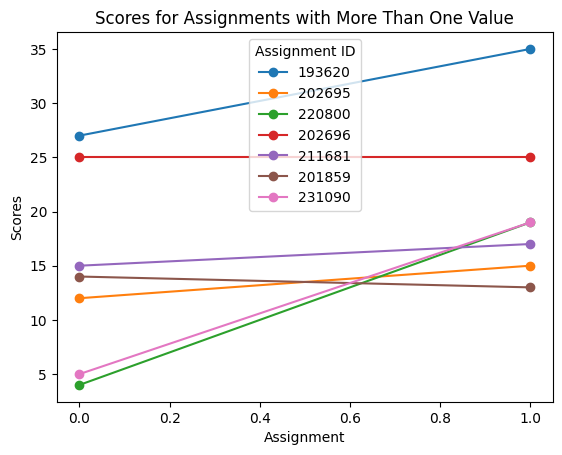

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the filtered_assignments dictionary to a DataFrame
df_filtered = pd.DataFrame.from_dict(filtered_assignments, orient='index').transpose()

# Plot a line chart
df_filtered.plot(kind='line', marker='o')

# Add labels and title
plt.xlabel('Assignment')
plt.ylabel('Scores')
plt.title('Scores for Assignments with More Than One Value')

# Display the chart
plt.legend(title='Assignment ID')
plt.show()

In [29]:
import pandas as pd

# Function to calculate percentage change
def calculate_percentage_change(old, new):
    if old == 0:
        return 0
    return ((new - old) / old) * 100

# Calculate percentage change for filtered assignments
percentage_changes = {}
for assignment, scores in filtered_assignments.items():
    percentage_changes[assignment] = []
    for i in range(1, len(scores)):
        change = calculate_percentage_change(scores[i-1], scores[i])
        percentage_changes[assignment].append(change)

# Convert the percentage changes dictionary to a DataFrame
df_percentage_changes = pd.DataFrame.from_dict(percentage_changes, orient='index').transpose()

# Output the DataFrame
df_percentage_changes

,193620,202695,220800,202696,211681,201859,231090
0,29.62963,25.0,375.0,0.0,13.333333,-7.142857,280.0


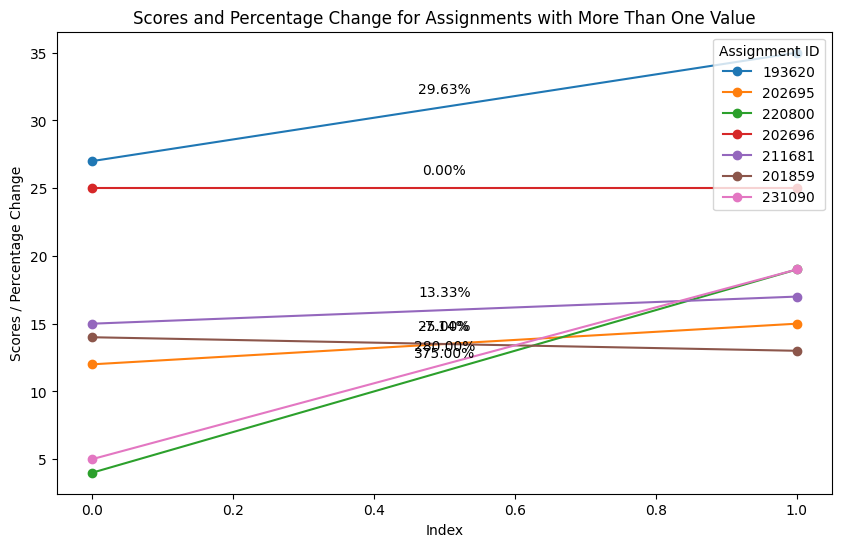

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the filtered_assignments dictionary to a DataFrame
df_filtered = pd.DataFrame.from_dict(filtered_assignments, orient='index').transpose()

# Plot a line chart for the original scores
ax = df_filtered.plot(kind='line', marker='o', figsize=(10, 6))

# Function to calculate percentage change
def calculate_percentage_change(old, new):
    if old == 0:
        return 0
    return ((new - old) / old) * 100

# Calculate percentage change for filtered assignments
percentage_changes = {}
for assignment, scores in filtered_assignments.items():
    percentage_changes[assignment] = []
    for i in range(1, len(scores)):
        change = calculate_percentage_change(scores[i-1], scores[i])
        percentage_changes[assignment].append(change)

# Annotate the percentage change on the line between the two points
for assignment, scores in filtered_assignments.items():
    for i in range(1, len(scores)):
        change = percentage_changes[assignment][i-1]
        x = [i-1, i]
        y = [scores[i-1], scores[i]]
        ax.annotate(f'{change:.2f}%', xy=((x[0] + x[1]) / 2, (y[0] + y[1]) / 2), textcoords="offset points", xytext=(0,10), ha='center')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Scores / Percentage Change')
plt.title('Scores and Percentage Change for Assignments with More Than One Value')

# Display the chart
plt.legend(title='Assignment ID')
plt.show()

In [31]:
import pandas as pd

# Convert the filtered_assignments dictionary to a DataFrame
df_filtered = pd.DataFrame.from_dict(filtered_assignments, orient='index').transpose()

# Function to calculate percentage change
def calculate_percentage_change(old, new):
    if old == 0:
        return 0
    return ((new - old) / old) * 100

# Calculate percentage change for filtered assignments
percentage_changes = {}
for assignment, scores in filtered_assignments.items():
    percentage_changes[assignment] = []
    for i in range(1, len(scores)):
        change = calculate_percentage_change(scores[i-1], scores[i])
        percentage_changes[assignment].append(change)

# Create a new DataFrame to store the original scores and percentage changes
data = []
for assignment, scores in filtered_assignments.items():
    for i in range(1, len(scores)):
        row = {'Assignment': assignment}
        for j in range(len(scores)):
            row[f'Original Score {j+1}'] = scores[j]
        row['Percentage Change'] = percentage_changes[assignment][i-1] if i > 0 else None
        data.append(row)

df_table = pd.DataFrame(data)

# Display the DataFrame as a table
df_table

,Assignment,Original Score 1,Original Score 2,Percentage Change
0,193620,27,35,29.629630
1,202695,12,15,25.000000
2,220800,4,19,375.000000
3,202696,25,25,0.000000
4,211681,15,17,13.333333
5,201859,14,13,-7.142857
6,231090,5,19,280.000000
